# Data Wrangling with Pandas

So you have learned how to import data, clean it up and save as a csv. Time to get our hands dirty and start digging deep

## Starting out

Time to load in our clean data and take a look to make sure everything is as it should be. We're going to import a couple of new libraries in this lesson so we can visualise our data

In [1]:
import pandas as pd
import matplotlib as plt

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/karrie/Desktop/DATA_TRAINING/CIJ_2018/clean_data.csv', parse_dates=['AcceptedDate'])
df.head()

,Unnamed: 0,RegulatedEntityName,AcceptedDate,DonorName_clean,DonorStatus,YEAR,Value,RegulatedEntityType,DonorId,CampaigningName
0,0,Vote Leave Limited,2106-06-17,Anthony Clake,Individual,2106,40000.0,Permitted Participant,77235,NaN
1,1,Plaid Cymru - The Party of Wales,2018-12-19,Mr Alun Ffred Jones,Individual,2018,20000.0,Political Party,83318,NaN
2,2,Conservative Middle East Council,2018-06-06,Rosemary Said,Individual,2018,50000.0,Regulated Donee,68108,NaN
3,3,Bob Stewart MP,2018-05-29,Government of Kazakhstan,Other,2018,2792.0,Regulated Donee,76273,NaN
4,4,Stephen Kinnock MP,2018-05-17,Community Union,Trade Union,2018,7000.0,Regulated Donee,74244,NaN


**Ah, we seem to have saved the index column from our previous dataframe. Let's delete this**

`del df['Unnamed: 0']`

In [3]:
del df['Unnamed: 0']
df.head()

,RegulatedEntityName,AcceptedDate,DonorName_clean,DonorStatus,YEAR,Value,RegulatedEntityType,DonorId,CampaigningName
0,Vote Leave Limited,2106-06-17,Anthony Clake,Individual,2106,40000.0,Permitted Participant,77235,NaN
1,Plaid Cymru - The Party of Wales,2018-12-19,Mr Alun Ffred Jones,Individual,2018,20000.0,Political Party,83318,NaN
2,Conservative Middle East Council,2018-06-06,Rosemary Said,Individual,2018,50000.0,Regulated Donee,68108,NaN
3,Bob Stewart MP,2018-05-29,Government of Kazakhstan,Other,2018,2792.0,Regulated Donee,76273,NaN
4,Stephen Kinnock MP,2018-05-17,Community Union,Trade Union,2018,7000.0,Regulated Donee,74244,NaN


**Ok let's check our data and make sure we have the correct data types and it's the right shape**

In [4]:
df.dtypes

RegulatedEntityName            object
AcceptedDate           datetime64[ns]
DonorName_clean                object
DonorStatus                    object
YEAR                            int64
Value                         float64
RegulatedEntityType            object
DonorId                         int64
CampaigningName                object
dtype: object

In [5]:
df.shape

(18480, 9)

## Counts, summing and percentage shares

**Let's see how many donations there are in total?**

`df['DonorName_clean'].count()`

In [6]:
df['DonorName_clean'].count()

18480

**Ok, let's see what the total value of donations is**

`df['Value'].sum()`

In [8]:
df['Value'].sum()

344262628.81000006

**Ok let's grab some basic descriptive stats and see what we've got**

`df.describe(include='all')`

In [9]:
df.describe(include='all')

,RegulatedEntityName,AcceptedDate,DonorName_clean,DonorStatus,YEAR,Value,RegulatedEntityType,DonorId,CampaigningName
count,18480,18480,18480,18480,18480.000000,1.848000e+04,18480,18480.000000,2
unique,607,1473,6287,11,NaN,NaN,4,NaN,2
top,Conservative and Unionist Party,2014-12-31 00:00:00,Communication Workers Union CWU,Individual,NaN,NaN,Political Party,NaN,Muslims for Britain
freq,6413,362,364,9237,NaN,NaN,15679,NaN,1
first,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2106-06-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2015.540801,1.862893e+04,NaN,56658.257522,NaN
std,NaN,NaN,NaN,NaN,1.381251,8.803529e+04,NaN,17013.555779,NaN
min,NaN,NaN,NaN,NaN,2014.000000,2.500000e+01,NaN,3.000000,NaN
25%,NaN,NaN,NaN,NaN,2014.000000,2.000000e+03,NaN,43696.500000,NaN


**Hmm let's see if any Donor gave more than once**

`df['DonorName_clean'].value_counts()`

In [10]:
df['DonorName_clean'].value_counts()

Communication Workers Union CWU                         364
Unite the Union                                         332
GMB                                                     295
UNISON                                                  208
United & Cecil Club                                     195
House of Commons                                        183
Co-operative Party                                      177
Union of Shop Distributive and Allied Workers           121
THE JOSEPH ROWNTREE REFORM TRUST LIMITED                101
Northern Ireland Assembly                                80
Union of Shop, Distributive and Allied Workers           77
Anthony Blair                                            72
Mr Paul Birch                                            69
Union of Construction, Allied Trades and Technicians     66
Conservative Friends of Israel                           65
Lord David Sainsbury                                     63
JCB Research                            

**Which entity/indidivual recieved the most?**

`df.groupby('RegulatedEntityName')['Value'].sum().sort_values(ascending=False)`

In [11]:
df.groupby('RegulatedEntityName')['Value'].sum().sort_values(ascending=False)

RegulatedEntityName
Conservative and Unionist Party                         1.235455e+08
Labour Party                                            1.027829e+08
Liberal Democrats                                       3.197308e+07
The In Campaign Ltd                                     1.211905e+07
Scottish National Party (SNP)                           9.994170e+06
Vote Leave Limited                                      9.858149e+06
UK Independence Party (UKIP)                            9.670081e+06
Co-operative Party                                      3.495754e+06
Leave.EU Group Ltd                                      3.200000e+06
Better Together 2012 Ltd                                2.464017e+06
Yes Scotland Limited                                    2.431000e+06
Green Party                                             2.170532e+06
Plaid Cymru - The Party of Wales                        1.468171e+06
Progress Ltd                                            1.208900e+06
Conservatives 

**Let's see who has the largest share of the donations**

`total_donations = df['Value'].sum()`
`total_per_receiver = df.groupby('RegulatedEntityName')['Value'].sum().sort_values()`
`percentage_share = (total_per_receiver/total_donations)*100`

In [12]:
total_donations = df['Value'].sum()

In [13]:
total_per_receiver = df.groupby('RegulatedEntityName')['Value'].sum().sort_values()

In [14]:
percentage_share = (total_per_receiver/total_donations)*100

**Ok who got the most money? .head() will give us the least so let's use .tail() to see who got the most**

In [15]:
percentage_share.tail()

RegulatedEntityName
Scottish National Party (SNP)       2.903066
The In Campaign Ltd                 3.520292
Liberal Democrats                   9.287410
Labour Party                       29.855955
Conservative and Unionist Party    35.886982
Name: Value, dtype: float64

## Digging deeper

**Let's see in which year the most amount of money was donated**

`df.groupby('YEAR')['Value'].sum()`

In [16]:
df.groupby('YEAR')['Value'].sum() 

YEAR
2014    84188324.26
2015    82107607.59
2016    88977025.32
2017    78685199.97
2018    10264471.67
2106       40000.00
Name: Value, dtype: float64

**Our data stretches from Jan 1 2015 before the 2015 election right up until April 2017. So let's investigate if more money was donated before or after Brexit. To do this we're going to create a new column with a boolean value**

`df['post_brexit'] = df['AcceptedDate'] <= '23/06/2016'`

In [17]:
df['post_brexit'] = df['AcceptedDate'] <= '23/06/2016'

**Now we're going to create a pivot table, summing the donations on whether they are before or after the brexit referendum***

`brexit_graph = df.groupby('post_brexit')['Value'].sum()`

In [18]:
brexit_graph = df.groupby('post_brexit')['Value'].sum()

**Time to plot our work**

`brexit_graph.plot(kind="bar")`

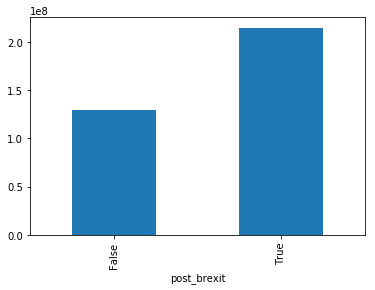

In [19]:
brexit_graph.plot(kind="bar")

**Which individual donated the most money?**

`individuals = df[df['DonorStatus'] == "individual"]`
`individuals.groupby('DonorName_clean')['Value'].sum().sort_values()`

In [20]:
individuals = df[df['DonorStatus'] == "Individual"]

In [21]:
individuals.shape

(9237, 10)

In [22]:
individuals.groupby('DonorName_clean')['Value'].sum().sort_values(ascending=False)

DonorName_clean
Lord David Sainsbury           7403263.50
Mr Peter Hargreaves            3200000.00
Mr Michael Davis               3149819.47
David Sainsbury                2915734.00
Mr John Griffin                2541750.00
Mrs Christine Weir             2250000.00
Mr Colin Weir                  2250000.00
Sir Michael Hintze             2078943.00
Mr James R Lupton              2062111.32
Mr Alexander  A Fraser         1770400.00
Jeremy Hosking                 1546736.27
Mr Andrew Law                  1503358.34
Mr John C Armitage             1500000.00
Mr Michael D Gooley            1500000.00
Mr David E D Brownlow          1480498.77
Brian Souter                   1400000.00
Mr George G Watson             1350000.00
Mr Michael S Farmer            1251479.60
Lord Michael S Farmer          1123622.32
Sir David Garrard              1051870.31
Lord Michael D Glendonbrook    1050000.00
Mr John E Gore                 1048250.00
Diana Van Nievelt Price        1001000.00
Ms Joanne Murray  

**Hmmm one of those names looks very similar to a former primeminister we all know, let's slice our data and see who he's been giving money to **

`blair = df[df['DonorName_clean'] == 'Anthony Blair']`

In [23]:
blair = df[df['DonorName_clean'] == 'Anthony Blair']
blair.head(30)

,RegulatedEntityName,AcceptedDate,DonorName_clean,DonorStatus,YEAR,Value,RegulatedEntityType,DonorId,CampaigningName,post_brexit
10662,Labour Party,2015-05-25,Anthony Blair,Individual,2015,1000.0,Political Party,67843,NaN,True
10712,Labour Party,2015-05-18,Anthony Blair,Individual,2015,1000.0,Political Party,67843,NaN,True
10864,Labour Party,2015-06-05,Anthony Blair,Individual,2015,1000.0,Political Party,67843,NaN,True
11331,Labour Party,2015-04-14,Anthony Blair,Individual,2015,2000.0,Political Party,67843,NaN,True
11367,Labour Party,2015-04-13,Anthony Blair,Individual,2015,1000.0,Political Party,67843,NaN,True
11407,Labour Party,2015-10-04,Anthony Blair,Individual,2015,1000.0,Political Party,67843,NaN,True
11432,Labour Party,2015-09-04,Anthony Blair,Individual,2015,1000.0,Political Party,67843,NaN,True
11433,Labour Party,2015-09-04,Anthony Blair,Individual,2015,1000.0,Political Party,67843,NaN,True
11536,Labour Party,2015-03-04,Anthony Blair,Individual,2015,1000.0,Political Party,67843,NaN,True
11562,Labour Party,2015-02-04,Anthony Blair,Individual,2015,1000.0,Political Party,67843,NaN,True


In [24]:
df.groupby(['DonorStatus', 'YEAR'])['Value'].sum().unstack().sort_values(2015).head(10)

YEAR,2014,2015,2016,2017,2018,2106
DonorStatus,,,,,,
Impermissible Donor,1000.00,3400.00,NaN,NaN,NaN,NaN
Registered Political Party,923609.00,151892.00,46841.00,118001.77,NaN,NaN
Trust,108301.45,222661.43,65721.90,129397.60,2953.14,NaN
Limited Liability Partnership,1231871.48,375776.44,490136.48,162570.55,4326.00,NaN
Other,608647.46,432018.81,1762774.87,752696.85,371131.77,NaN
Friendly Society,863662.00,930388.00,905252.00,835372.00,8000.00,NaN
Unincorporated Association,3208516.16,3030568.06,2793066.30,2666508.97,602760.08,NaN
Public Fund,8945706.06,9937199.08,12052062.61,11585836.76,2072631.55,NaN
Trade Union,11114626.66,15669676.23,9516650.75,13745109.03,1335554.37,NaN


In [25]:
most = df.groupby(['DonorStatus', 'YEAR'])['Value'].sum().unstack().sort_values(2015).head(10)

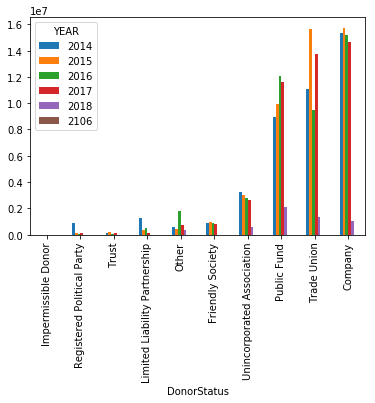

In [26]:
most.plot(kind="bar")


## Wrapping up

**Ok that's all folks!**

Today you got a small taste of what is possible with Pandas, if you want to learn more then check out some of the links below

* dataquest.io - https://www.dataquest.io/blog/pandas-python-tutorial/
* 10 minutes to pandas - http://pandas.pydata.org/pandas-docs/stable/10min.html
* 19 essential snippets in pandas - https://jeffdelaney.me/blog/useful-snippets-in-pandas/